# Анализ качества работы нейронной сети для распознавания моделей одежды в Keras

In [182]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout, Input
from keras import utils
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Any
from PIL import Image
%matplotlib inline

## Включить CUDA
(или хотя бы попытаться...)

In [183]:
print("TF:", tf.__version__)
print("GPUs:", tf.config.list_physical_devices("GPU"))

TF: 2.20.0
GPUs: []


Не получилось.

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [184]:
# В Keras встроены средства работы с популярными наборами данных
# (x_train, y_train) - набор данных для обучения
# (x_test, y_test) - набор данных для тестирования
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Список с названиями классов

In [185]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

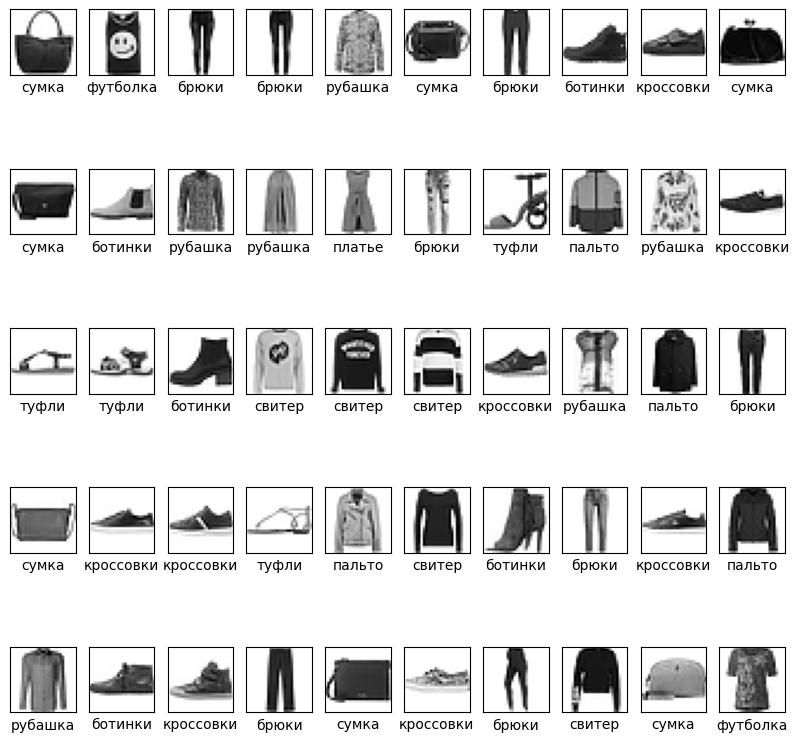

In [186]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [187]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

**Нормализация данных**

In [188]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255
x_test = x_test / 255

**Работа с правильными ответами**

In [189]:
n = 0

In [190]:
print(y_train[n])

9


**Преобразуем метки в формат one hot encoding**

In [191]:
y_train = utils.to_categorical(y_train, 10)

In [192]:
y_test = utils.to_categorical(y_test, 10)

**Правильный ответ в формате one hot encoding**

In [193]:
print(y_train[n])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Создаем последовательную модель**

In [194]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству выходных классов)
model.add(Dense(10, activation="softmax"))

C:\Users\vadim\Documents\Labs\LabsDataAnalysisAndModeling\.venv\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**Компилируем сеть**

In [195]:
model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 800)            │       628,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,010 (2.43 MB)

 Trainable params: 636,010 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

None


## Обучаем нейронную сеть

In [196]:
history = model.fit(x_train, y_train,
                    batch_size=200,
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8135 - loss: 0.5360 - val_accuracy: 0.8576 - val_loss: 0.4126
Epoch 2/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8615 - loss: 0.3880 - val_accuracy: 0.8632 - val_loss: 0.3939
Epoch 3/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8757 - loss: 0.3446 - val_accuracy: 0.8533 - val_loss: 0.4085
Epoch 4/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8858 - loss: 0.3156 - val_accuracy: 0.8787 - val_loss: 0.3330
Epoch 5/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8907 - loss: 0.2968 - val_accuracy: 0.8826 - val_loss: 0.3264
Epoch 6/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8991 - loss: 0.2749 - val_accuracy: 0.8860 - val_loss: 0.3249
Epoch 7/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9038 - loss: 0.2636 - val_accuracy: 0.8870 - val_loss: 0.3224
Epoch 8/10
240/240 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9072 - loss: 0.2514 - val_accuracy: 0.

## Сохраняем нейронную сеть для последующего использования

In [197]:
model.save('fashion_mnist_dense.h5')

## Оценка качества обучения

Проверка качества работы на наборе данных для тестирования

In [198]:
scores = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8777 - loss: 0.3535


In [199]:
print("Доля верных ответов на тестовых данных, в процентах:", round(scores[1] * 100, 4))

Доля верных ответов на тестовых данных, в процентах: 87.77


## Используем сеть для распознавания предметов одежды

In [200]:
n_rec = 496

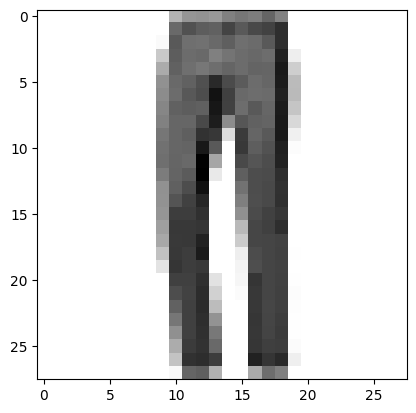

In [201]:
plt.imshow(x_test[n_rec].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

**Меняем размерность изображения и нормализуем его**

In [202]:
x = x_test[n_rec]
x = np.expand_dims(x, axis=0)

**Запускаем распознавание**

In [203]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


**Печатаем результаты распознавания**

In [204]:
prediction

array([[3.4515972e-07, 9.9999952e-01, 2.9605925e-08, 9.7218610e-08,
        1.6207059e-08, 3.0265620e-11, 5.4255178e-09, 8.7000833e-13,
        1.4713315e-10, 3.0979861e-11]], dtype=float32)

**Печатаем правильный ответ**

In [205]:
label = np.argmax(y_test[n_rec])
print("Номер класса:", label)
print("Название класса:", classes[label])

Номер класса: 1
Название класса: брюки


## Загружаем свою картинку

Загружаем картинку из файла

In [206]:
img_path = 'img/tee.webp'
img = image.load_img(img_path, target_size=(28, 28), color_mode = "grayscale")

Показываем картинку

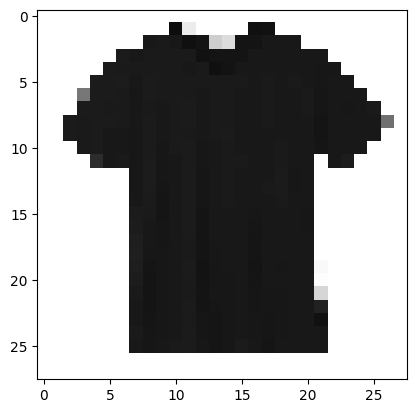

In [207]:
plt.imshow(img.convert('RGBA'))
plt.show()

Преобразуем картинку для обработки нейронной сетью

In [208]:
# Преобразуем картинку в массив
x = image.img_to_array(img)
# Меняем форму массива в плоский вектор
x = x.reshape(1, 784)
# Инвертируем изображение
x = 255 - x
# Нормализуем изображение
x /= 255

Запускаем распознавание

In [209]:
prediction = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


Результаты распознавания

In [210]:
prediction

array([[5.4160619e-01, 9.1694562e-07, 1.5033027e-03, 4.3754964e-04,
        1.5285918e-04, 3.4775283e-10, 4.5597720e-01, 1.4295997e-13,
        3.2204526e-04, 6.7439820e-10]], dtype=float32)

In [211]:
prediction = np.argmax(prediction)
print("Номер класса:", prediction)
print("Название класса:", classes[prediction])

Номер класса: 0
Название класса: футболка


## Keras Tuner

Keras Tuner - это простая среда для автоматизации настройки оптимальных гиперпараметров. Поставляется со встроенными алгоритмами случайного поиска, гиперполосной оптимизации и байесовской оптимизации.<br/>

Последовательность настройки гиперпараметров:
*   Определить модель
*   Указать гиперпараметры для настройки
*   Определить пространство поиска
*   Определить алгоритм поиска

### Определение модели
Модель, которая создается для гипертюнинга, называется *гипермоделью*.
Есть два способа построить гипермодель:
*  Используя функцию построителя модели
*  Используя подкласс [HyperModel](https://keras.io/guides/keras_tuner/getting_started/#you-can-use-a-hypermodel-subclass-instead-of-a-modelbuilding-function) API Keras Tuner


Воспользуемся первым способом. Функция построения модели использует определенные гиперпараметры для возврата скомпилированной модели.

### Гиперпараметры для настройки
Гмпермодель очень похожа на неглубокую DNN, которая была обучена ранее, за исключением того, что будут настроены четыре гиперпараметра модели:
1.   Количество скрытых слоев
2.   Количество нейронов в каждом скрытом слое
3.   Процент выпадения после каждого скрытого слоя
4.   Скорость обучения оптимизатора Adam
    
    
    

### Определение пространства поиска
Это делается путем передачи объекта HyperParameters в качестве параметра функции построения модели, которая настраивает гиперпараметры. Используем следующие параметры:
*   hp.Int() для определения области поиска по количеству скрытых слоев и количества нейронов в каждом скрытом слое. Позволяет определять минимальные и максимальные значения, а также размер шага для увеличения.
*   hp.Float() для определения области поиска параметра droput. Похоже на hp.In(), за исключением того, что принимает плавающие значения.
*   hp.Choice() для определения области поиска скорости обучения. Позволяет определять дискретные значения.
Более подробную информацию обо всех доступных методах и их использовании можно найти в [официальной документации](https://keras.io/api/keras_tuner/hyperparameters/).




In [212]:
!pip install keras-tuner -q


[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [213]:
import keras_tuner as kt

In [214]:
# def build_model(hp):
#     """
#     Builds model and sets up hyperparameter space to search.
# 
#     Parameters
#     ----------
#     hp : HyperParameter object
#         Configures hyperparameters to tune.
# 
#     Returns
#     -------
#     model : keras model
#         Compiled model with hyperparameters to tune.
#     """
#     # Initialize sequential API and start building model.
#     model = keras.Sequential()
#     # model.add(keras.layers.Flatten(input_shape=(28,28)))
# 
#     # Tune the number of hidden layers and units in each.
#     # Number of hidden layers: 1 - 5
#     # Number of Units: 32 - 512 with stepsize of 32
#     for i in range(1, hp.Int("num_layers", 1, 5)):
#         model.add(
#             keras.layers.Dense(
#                 units=hp.Int("units_" + str(i), min_value=32, max_value=512, step=32),
#                 activation="relu", input_dim=784,)
#             )
# 
#         # Tune dropout layer with values from 0 - 0.3 with stepsize of 0.1.
#         model.add(keras.layers.Dropout(hp.Float("dropout_" + str(i), 0, 0.3, step=0.1)))
# 
#     # Add output layer.
#     model.add(keras.layers.Dense(units=10, activation="softmax"))
# 
#     # Tune learning rate for Adam optimizer with values from 0.01, 0.001, or 0.0001
#     hp_learning_rate = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])
# 
#     # Define optimizer, loss, and metrics
#     model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
#                   loss="categorical_crossentropy",
#                   # loss=keras.losses.SparseCategoricalCrossentropy(),
#                   metrics=["accuracy"])
# 
#     return model
# # model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

def build_model(hp: kt.HyperParameters) -> keras.Model:
    """
    Keras Tuner model:
    - input_units: 400, 600, 800, 1200
    - hidden layers: 0..3
    - hidden_units: 200, 300, 400, 600, 800
    - dropout: 0.0..0.5
    - learning_rate: {1e-2, 1e-3, 1e-4}
    """
    model = Sequential()
    model.add(Input(shape=(784,)))  # assumes x_train is flattened

    # input layer units (mandatory)
    input_units = hp.Choice("input_units", [400, 600, 800, 1200])
    model.add(Dense(input_units, activation="relu"))

    # number of hidden layers: 0..3
    num_hidden = hp.Int("num_hidden", min_value=0, max_value=3)

    for i in range(num_hidden):
        units = hp.Choice(f"hidden_units_{i}", [200, 300, 400, 600, 800])
        model.add(Dense(units, activation="relu"))

        dropout_rate = hp.Float(
            f"dropout_{i}",
            min_value=0.0,
            max_value=0.5,
            step=0.1
        )
        model.add(Dropout(dropout_rate))

    # output layer
    model.add(Dense(10, activation="softmax"))

    # learning rate
    lr = hp.Choice("learning_rate", values=[1e-2, 1e-3, 1e-4])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss="categorical_crossentropy",   # for one-hot labels
        metrics=["accuracy"],
    )
    return model


### Определение алгоритма поиска
Для поиска оптимальных гиперпараметров будем использовать алгоритм Hyperband. Это новый подход, разработанный специально для оптимизации гиперпараметров. Подробное описание алгоритма можно найти [здесь](https://jmlr.org/papers/v18/16-558.html).
Основная идея алгоритма: Hyperband использует сетку в стиле спортивного чемпионата и начинает со случайного выбора большого количества моделей со случайными перестановками гиперпараметров из области поиска. Каждая модель обучается в течение нескольких эпох, затем наиболее эффективная половина моделей переходит в следующий раунд.<br/>
Чтобы создать экземпляр тюнера, нужно определить следующие гиперпараметры:
*   Гипермодель (функция построителя моделей).
*   Цель - направление поиска (минимальное или максимальное), автоматически определяется для встроенных метрик, для пользовательских метрик можно использовать kerastuner.Objective.
*   Factor и max_epochs используются для расчета количества моделей путем взятия логарифмического базового фактора max_epochs + 1. Это число округляется до ближайшего целого числа.
*   Итерации Hyperband используются для управления ресурсами. Гиперполосные итерации - это количество повторений по всему алгоритму поиска.
*   Каталог сохраняет журналы и контрольные точки для каждого пробного запуска во время поиска по гиперпараметрам, что позволяет продолжить поиск с того места, где остановились в последний раз. Данную опцию можно отключить, установив дополнительный гиперпараметр «overwrite» = True.
*   Project_name используется для отличия от других запусков и является подкаталогом в каталоге.<br/>
Со списком всех доступных параметров можно ознакомиться в [документации](https://keras.io/api/keras_tuner/tuners/hyperband/).






In [236]:
# Instantiate the tuner
tuner = kt.Hyperband(build_model,
                     objective="val_accuracy",
                     max_epochs=100,
                     factor=3,
                     hyperband_iterations=5,
                     directory="kt_dir",
                     project_name="kt_hyperband")

# tuner = kt.BayesianOptimization(build_model,
#                                 objective="val_accuracy",
#                                 max_trials=20,
#                                 num_initial_points=3,
#                                 directory="kt_dir_bo",
#                                 project_name="kt_bayesian")

Reloading Tuner from kt_dir\kt_hyperband\tuner0.json


Сводка пространства поиска

In [216]:
tuner.search_space_summary()

Search space summary
Default search space size: 3
input_units (Choice)
{'default': 400, 'conditions': [], 'values': [400, 600, 800, 1200], 'ordered': True}
num_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 0, 'max_value': 3, 'step': 1, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}


Установим обратные вызовы с ранней остановкой, чтобы прервать обучение, если показатели модели не улучшаются.

In [238]:
from keras.src.callbacks import EarlyStopping

stop_early = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

NUM_EPOCHS = 64
tuner.search(x_train, y_train, epochs=NUM_EPOCHS, validation_split=0.2, callbacks=[stop_early], verbose=1)

Trial 242 Complete [00h 02m 27s]
val_accuracy: 0.9010000228881836

Best val_accuracy So Far: 0.9045000076293945
Total elapsed time: 03h 31m 49s

Search: Running Trial #243

Value             |Best Value So Far |Hyperparameter
400               |1200              |input_units
0                 |3                 |num_hidden
0.01              |0.0001            |learning_rate
400               |800               |hidden_units_0
0                 |0.3               |dropout_0
600               |400               |hidden_units_1
0                 |0                 |dropout_1
300               |600               |hidden_units_2
0.2               |0.4               |dropout_2
34                |34                |tuner/epochs
0                 |12                |tuner/initial_epoch
1                 |2                 |tuner/bracket
0                 |1                 |tuner/round

Epoch 1/34
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8083 - loss: 0.5527 - val_accuracy: 0.83

KeyboardInterrupt: 

После завершения поиска можно получить лучшие гиперпараметры и переобучить модель.

In [239]:
# Get the optimal hyperparameters from the results
best_hps=tuner.get_best_hyperparameters()[0]

# Build model
h_model = tuner.hypermodel.build(best_hps)

# Train the hypertuned model
h_model.fit(x_train, y_train, epochs=NUM_EPOCHS, validation_split=0.2, callbacks=[stop_early], verbose=1)

Epoch 1/64
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7918 - loss: 0.5901 - val_accuracy: 0.8459 - val_loss: 0.4252
Epoch 2/64
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8601 - loss: 0.3897 - val_accuracy: 0.8666 - val_loss: 0.3670
Epoch 3/64
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8764 - loss: 0.3414 - val_accuracy: 0.8756 - val_loss: 0.3389
Epoch 4/64
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8855 - loss: 0.3115 - val_accuracy: 0.8865 - val_loss: 0.3082
Epoch 5/64
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.8937 - loss: 0.2875 - val_accuracy: 0.8890 - val_loss: 0.3057
Epoch 6/64
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9007 - loss: 0.2669 - val_accuracy: 0.8927 - val_loss: 0.3027
Epoch 7/64
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9065 - loss: 0.2507 - val_accuracy: 0.8855 - val_loss: 0.3144
Epoch 8/64
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.9114 - lo

Оценить гипертонастроенную модель на тестовом наборе.

In [240]:
model = tuner.get_best_models(1)[0]
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1200)           │       942,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 800)            │       960,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 400)            │       320,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 400)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 600)            │       240,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 600)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         6,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,469,810 (9.42 MB)

 Trainable params: 2,469,810 (9.42 MB)

 Non-trainable params: 0 (0.00 B)

In [241]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
test_loss, test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8989 - loss: 0.5008


(0.500826358795166, 0.8988999724388123)

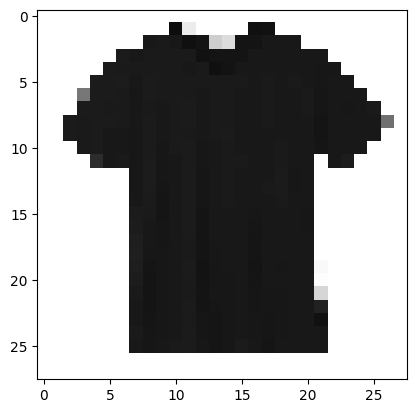

In [244]:
img = image.load_img('img/tee.webp', target_size=(28, 28), color_mode="grayscale")
plt.imshow(img.convert('RGBA'))

In [245]:
x = image.img_to_array(img)
x = x.reshape(1, 784)
x = 255 - x
x /= 255

prediction = model.predict(x)
idx = prediction.argmax()
classes[idx]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


'футболка'